In [1]:
conda env list

# conda environments:
#
base                     /Users/achartra/Applications/miniforge3
PINNICLE              *  /Users/achartra/Applications/miniforge3/envs/PINNICLE
allison                  /Users/achartra/Applications/miniforge3/envs/allison


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('CPU')))


Num GPUs Available:  1


In [1]:
# Testing PINNICLE
# Infer basal friction coefficients using SSA

import pinnicle as pinn
import numpy as np
import deepxde as dde
import matplotlib.pyplot as plt
from datetime import datetime

# Set up some configurations
dde.config.set_default_float('float64')
dde.config.disable_xla_jit()
dde.config.set_random_seed(1234)


Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Disable just-in-time compilation with XLA.


Set the default float type to float64


In [ ]:
# experiment.load_model(path='./PINNs/Ryder_test_I20240729_140936_P20240729_154130')
# experiment = pinn.PINN(loadFrom='./PINNs/Ryder_test_I20240729_140936_P20240731_144431')

experiment.load_model(path='./PINNs/Ryder_test_I20240729_140936_P20240731_141329')
new_folder = experiment.params.
experiment.update_parameters({"save_path": new_folder})

In [4]:
# Load the correct data

issm_filename = "Ryder_issm2024-Dec-19_3"
datestr = datetime.now().strftime("%y-%b-%d")

issm_pinn_path = issm_filename + "_pinn" + datestr + "_L1"
# General parameters for training
# Setting up dictionaries
# order doesn't matter, but keys DO matter
hp = {}

# Load data ? 
# In data_size, each key:value pair defines a variable in the training. 
# if the key is not redefined in name_map, then it will be used as default 
# or set in the physics section above. The value associated with the key 
# gives the number of data points used for training.
# If the value is set to None, then only Dirichlet BC around the domain 
# boundary will be used for the corresponding key. If the variable is included
# in the training, but not given in data_size, then there will be no data for this variable in the training
flightTrack = {}
flightTrack["data_path"] = "Ryder_xyz_ds.mat"
flightTrack["data_size"] = {"H": 1000}
flightTrack["name_map"] = {"H": "thickness"}
flightTrack["source"] = "mat"
# hp["data"] = {"ft": flightTrack}

issm = {}
issm["data_path"] =  "Models/" + issm_filename + ".mat"
issm["data_size"] = {"u":100, "v":100, "s":100, "H":None, "C":100, "vel":100}
hp["data"] = {"ISSM":issm} # hp = 'hyperparameters'
hp["data"] = {"ISSM":issm, "ft": flightTrack}

hp["epochs"] = int(2e3)
hp["learning_rate"] = 0.001
hp["loss_function"] = "MSE"
hp["save_path"] = "./PINNs/" + issm_pinn_path
hp["is_save"] = True
hp["is_plot"] = True

# Set NN architecture
hp["activation"] = "tanh"
hp["initializer"] = "Glorot uniform"
hp["num_neurons"] = 20
hp["num_layers"] = 6
hp["input"] = ['y', 'x']

# Define domain of computation
hp["shapefile"] = "./Ryder_32_09.exp"
# Define number of collocation points used to evaluate PDE residual
hp["num_collocation_points"] = 2000

# Add physics
yts = pinn.physics.Constants().yts

# SSA = {}
# SSA["scalar_variables"] = {"B":5.278336e+07}
# hp["equations"] = {"SSA":SSA}

MOLHO = {}
MOLHO["scalar_variables"] = {"B":2e+08}
hp["equations"] = {"MOLHO":MOLHO}
                    #        u                 v                u_base               v_base            s        H      C
MOLHO["data_weights"] = [(1.0e-2*yts)**2.0, (1.0e-2*yts)**2.0, (1.0e-2*yts)**2.0, (1.0e-2*yts)**2.0, 5.0e-6, 5.0e-6, 5.0e-8]

# Add an additional loss function to balance the contributions between the fast flow and slow moving regions:
# vel_loss = {}
# vel_loss['name'] = "vel log"
# vel_loss['function'] = "VEL_LOG"
# vel_loss['weight'] = 1.0e-5
# hp["additional_loss"] = {"vel":vel_loss}

experiment = pinn.PINN(hp) # set up class PINN (in pinn.py in pinnicle package)
experiment.update_parameters(hp)
print(experiment.params) # make sure that settings are in correct spot (keys must be correct)

ERROR:root:ERROR: MATLAB type not supported: qmustatistics, (uint32)
ERROR:root:ERROR: MATLAB type not supported: lovenumbers, (uint32)
ERROR:root:ERROR: MATLAB type not supported: rotational, (uint32)
ERROR:root:ERROR: MATLAB type not supported: solidearthsettings, (uint32)


t is not found in the data from Ryder_xyz_ds.mat, please specify the mapping in 'X_map'
add input transform with [ -128000. -1134000.] and [  22000. -984000.]
add output transform with [-3.1709792e-04 -3.1709792e-04 -3.1709792e-04 -3.1709792e-04
 -1.0000000e+03  1.0000000e+01  1.0000000e-02] and [3.1709792e-04 3.1709792e-04 3.1709792e-04 3.1709792e-04 3.6000000e+03
 3.5000000e+03 1.0000000e+04]


ERROR:root:ERROR: MATLAB type not supported: qmustatistics, (uint32)
ERROR:root:ERROR: MATLAB type not supported: lovenumbers, (uint32)
ERROR:root:ERROR: MATLAB type not supported: rotational, (uint32)
ERROR:root:ERROR: MATLAB type not supported: solidearthsettings, (uint32)


t is not found in the data from Ryder_xyz_ds.mat, please specify the mapping in 'X_map'
add input transform with [ -128000. -1134000.] and [  22000. -984000.]
add output transform with [-3.1709792e-04 -3.1709792e-04 -3.1709792e-04 -3.1709792e-04
 -1.0000000e+03  1.0000000e+01  1.0000000e-02] and [3.1709792e-04 3.1709792e-04 3.1709792e-04 3.1709792e-04 3.6000000e+03
 3.5000000e+03 1.0000000e+04]
Parameters: 
	TrainingParameter: 
		epochs:	2000
		optimizer:	adam
		loss_functions:	['MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE']
		additional_loss:	{}
		learning_rate:	0.001
		loss_weights:	[1e-10, 1e-10, 1e-10, 1e-10, 99451929600.0, 99451929600.0, 5e-06, 5e-06, 5e-08]
		has_callbacks:	False
		min_delta:	None
		patience:	None
		period:	None
		checkpoint:	False
		save_path:	./PINNs/Ryder_issm2024-Dec-19_3_pinn25-Jan-09_L1
		is_save:	True
		is_plot:	True
	DomainParameter: 
		shapefile:	./Ryder_32_09.exp
		num_collocation_points:	2000
		time_dependent:	False
		start_time:	0
		en

In [4]:
print(experiment.model_data.data["ISSM"].data_dict)

{'u': array([-9.49538371e-07, -9.64747556e-07, -9.79128093e-07, ...,
       -2.63316449e-07, -2.70297885e-07, -2.75075768e-07]), 'v': array([9.48417314e-07, 9.54914421e-07, 9.60287952e-07, ...,
       6.52693239e-07, 6.58142163e-07, 6.61540340e-07]), 's': array([1931.39472453, 1929.55946971, 1927.42223094, ..., 1716.65321668,
       1714.5909219 , 1715.15967814]), 'a': array([0., 0., 0., ..., 0., 0., 0.]), 'H': array([1921.82692464, 1913.02073491, 1906.12138086, ..., 1234.0069887 ,
       1235.3921668 , 1240.84659831]), 'B': array([52783359.5988998, 52783359.5988998, 52783359.5988998, ...,
       52783359.5988998, 52783359.5988998, 52783359.5988998]), 'vel': array([1.34205757e-06, 1.35742381e-06, 1.37143894e-06, ...,
       7.03806804e-07, 7.11485806e-07, 7.16451184e-07]), 'C': array([3000.        , 3000.00030203, 2999.99511684, ..., 3001.18993456,
       3000.31204365, 3000.        ])}


In [3]:
yts = 31536000.0
experiment.model_data.variable_lb['u'] = -500/yts
experiment.model_data.variable_lb['v'] = -500/yts
experiment.model_data.variable_ub['u'] = 500/yts
experiment.model_data.variable_ub['v'] = 500/yts
# {'v': -500/yts, 's': -1000.0, 'H': 10.0, 'C': 0.01, 'a': -1.5854895991882294e-07, 'B': 70000000.0, 'u_base': -500/yts, 'v_base': -500/yts} 
# experiment.model_data.variable_ub{'u': 500/yts, 'v': 500/yts, 's': 3600.0, 'H': 3500.0, 'C': 10000.0, 'a': 1.5854895991882294e-07, 'B': 700000000.0, 'u_base': 500/yts, 'v_base': 500/yts}

Compiling model...
'compile' took 0.005288 s

Training model...



/Users/achartra/Applications/miniforge3/envs/PINNICLE/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
2025-01-09 14:38:24.912838: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [1.72e+01, 7.99e+01, 1.27e+01, 1.14e+01, 1.14e+01, 2.00e+02, 2.54e+00, 3.24e-01, 2.02e-01]    [1.72e+01, 7.99e+01, 1.27e+01, 1.14e+01, 1.14e+01, 2.00e+02, 2.54e+00, 3.24e-01, 2.02e-01]    []  
2000      [4.11e-03, 8.55e-03, 1.09e-03, 3.62e-03, 2.45e-03, 4.10e-03, 1.20e-02, 1.25e-01, 3.84e-02]    [4.11e-03, 8.55e-03, 1.09e-03, 3.62e-03, 2.45e-03, 4.10e-03, 1.20e-02, 1.25e-01, 3.84e-02]    []  

Best model at step 2000:
  train loss: 1.99e-01
  test loss: 1.99e-01
  test metric: []

'train' took 451.490370 s



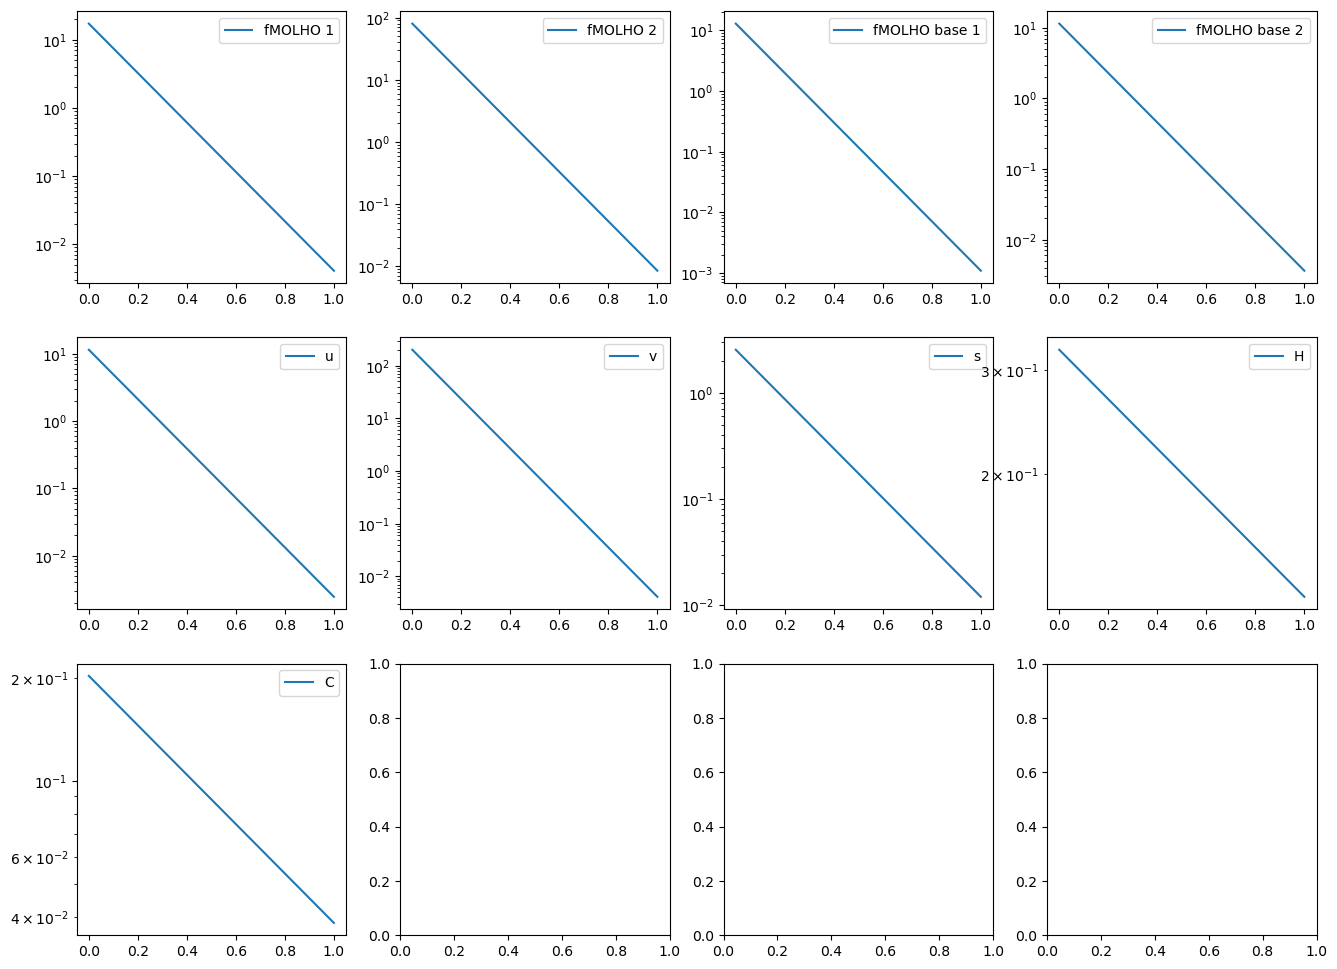

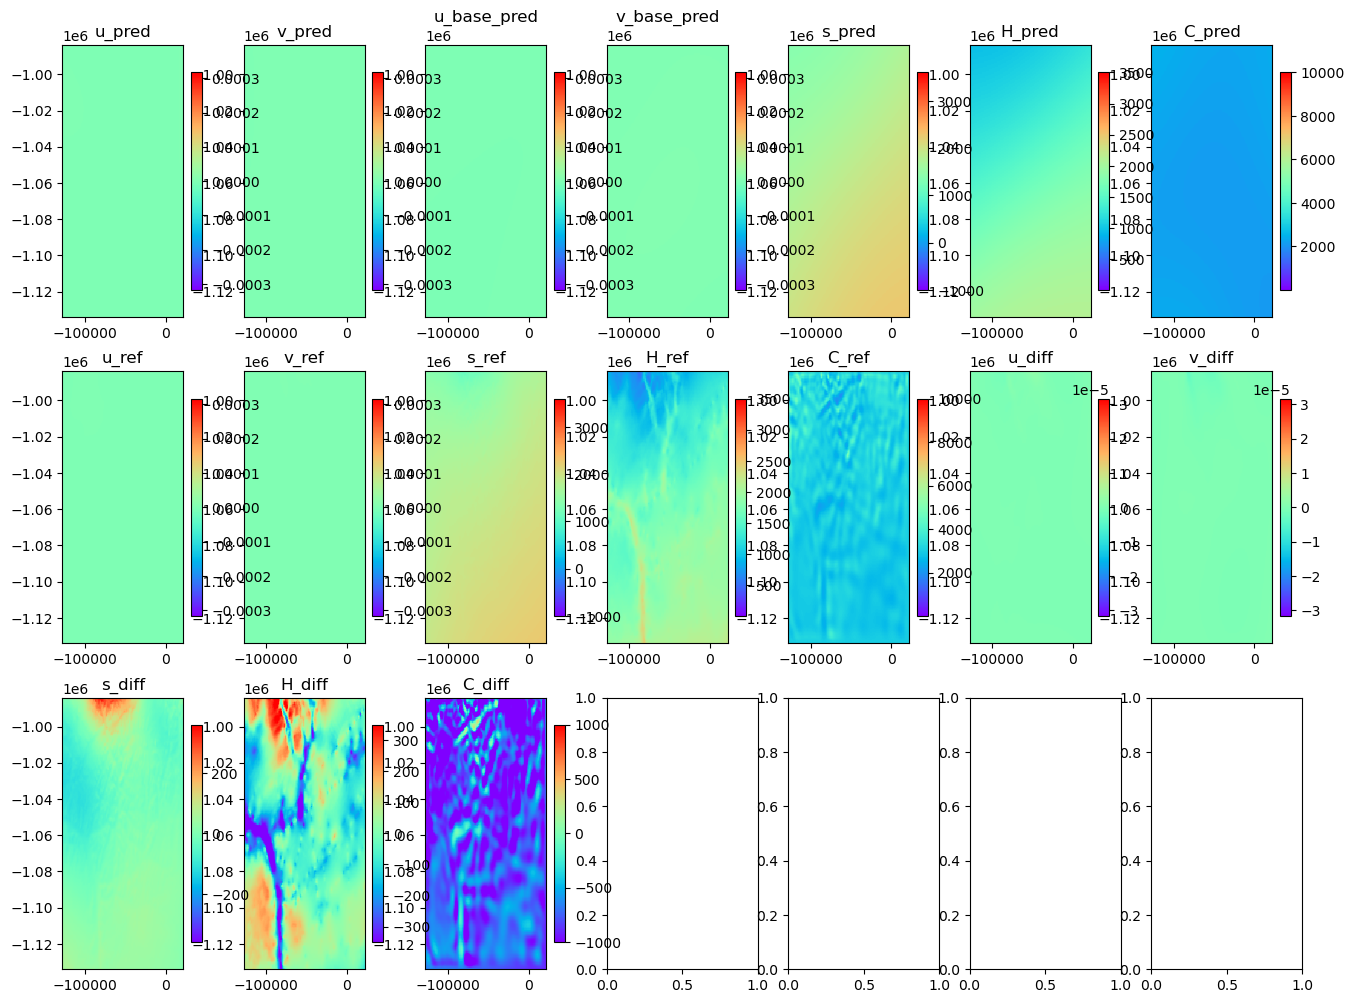

In [5]:
# Now run the PINN model
experiment.compile()

# Train
experiment.train()
# Show results
experiment.plot_predictions(X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

In [312]:
print(dir(experiment.dde_data.geom))
print(type(experiment.dde_data.geom.area))
print(experiment.dde_data.geom.area)

['__abstractmethods__', '__and__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_abc_impl', 'area', 'background_points', 'bbox', 'boundary_constraint_factor', 'boundary_normal', 'diagonals', 'diam', 'difference', 'dim', 'distance2boundary', 'idstr', 'inside', 'intersection', 'mindist2boundary', 'normal', 'nvertices', 'on_boundary', 'perimeter', 'periodic_point', 'random_boundary_points', 'random_points', 'segments', 'uniform_boundary_points', 'uniform_points', 'union', 'vertices']
<class 'numpy.float64'>
22500000000.0


In [36]:
data_size = experiment.model_data.data["ISSM"].parameters.data_size
print(data_size)

{'u': 1800, 'v': 1800, 's': 1800, 'H': 1800, 'C': 1800, 'vel': 1800}


In [39]:
# Print training data
print(dir(experiment.model_data.data["ISSM"]))
iice = experiment.model_data.data["ISSM"].get_ice_indices()
X_temp = np.hstack([experiment.model_data.data["ISSM"].X_dict[k][iice].flatten()[:,None] for k in experiment.model_data.data["ISSM"].parameters.X_map if k in experiment.model_data.data["ISSM"].X_dict])
max_data_size = X_temp.shape[0]
idx = np.random.choice(max_data_size, min(data_size['u'], max_data_size), replace=False)
print(idx.shape)
# Print class
# print(type(experiment.model.predict))
# print(type(experiment.model_data))

['X', 'X_dict', '_DATA_TYPE', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', 'create', 'data_dict', 'g', 'get_ice_coordinates', 'get_ice_indices', 'load_data', 'mask_dict', 'mesh_dict', 'parameters', 'plot', 'prepare_training_data', 'rhoi', 'rhow', 'sol', 'subclasses', 'variable_lb', 'variable_ub', 'yts']
(1800,)


In [6]:
# How to print different sections of model
# print(experiment.params.training)

print(experiment.params.nn.output_lb)
print(experiment.model.predict)

import deepxde.backend as bkd

resolution = 150

    # generate 200x200 mesh on the domain
X, Y = np.meshgrid(np.linspace(experiment.params.nn.input_lb[0], experiment.params.nn.input_ub[0], resolution),
                   np.linspace(experiment.params.nn.input_lb[1], experiment.params.nn.input_ub[1], resolution))
X_nn = np.hstack((X.flatten()[:,None], Y.flatten()[:,None]))
grid_size = 2.0*(((experiment.params.nn.input_ub[0] - experiment.params.nn.input_lb[0])/resolution)**2+
                 ((experiment.params.nn.input_ub[1] - experiment.params.nn.input_lb[1])/resolution)**2)**0.5
if bkd.backend_name == "pytorch":
    grid_size = bkd.to_numpy(grid_size)

# predicted solutions
sol_pred = experiment.model.predict(X_nn)


[-3.1709792e-04 -3.1709792e-04 -3.1709792e-04 -3.1709792e-04
 -1.0000000e+03  1.0000000e+01  1.0000000e-02]
<bound method Model.predict of <deepxde.model.Model object at 0x10378dcf0>>


In [6]:
import hdf5storage
import scipy
 
mat_data = {} # make a dictionary to store the MAT data in
vars2save = ['sol_pred','X_nn']
for i, var_curr in enumerate(vars2save):
    exec(f'mat_data[u"{var_curr}"] = {var_curr}')
 
hdf5storage.savemat(hp["save_path"] + '/' + issm_pinn_path + '_predictions.mat', mat_data, format='7.3', oned_as='row', store_python_metadata=True)

In [148]:
print(dir())

['In', 'KDTree', 'ListedColormap', 'MOLHO', 'Out', 'X', 'X_nn', 'X_ref', 'Y', '_', '_13', '_14', '_143', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__session__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i103', '_i104', '_i105', '_i106', '_i107', '_i108', '_i109', '_i11', '_i110', '_i111', '_i112', '_i113', '_i114', '_i115', '_i116', '_i117', '_i118', '_i119', '_i12', '_i120', '_i121', '_i122', '_i123', '_i124', '_i125', '_i126', '_i127', '_i128', '_i129', '_i13', '_i130', '_i131', '_i132', '_i133', '_i134', '_i135', '_i136', '_i137', '_i138', '_i139', '_i14', '_i140', '_i141', '_i142', '_i143', '_i144', '_i145', '_i146', '_i147', '_i148', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i44', '_i45', '_

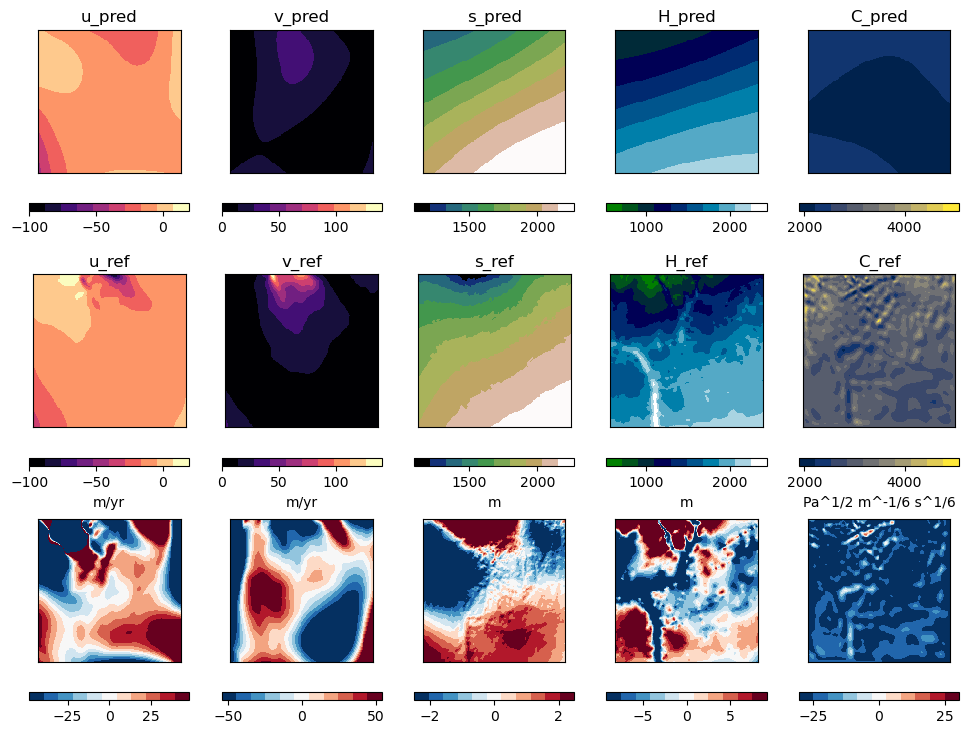

In [140]:
# Plotting attempts

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import matplotlib as mpl
import deepxde.backend as bkd
from matplotlib.colors import ListedColormap
from scipy.interpolate import griddata
from scipy.spatial import cKDTree as KDTree
import scipy.io as sio
import pandas as pd
from scipy.stats import iqr

print(len(plot_data))

X_ref=experiment.model_data.data["ISSM"].X_dict
X_ref = np.hstack((X_ref['x'].flatten()[:,None],X_ref['y'].flatten()[:,None]))

sol_ref=experiment.model_data.data["ISSM"].data_dict
ref_data = {k:griddata(X_ref, sol_ref[k].flatten(), (X, Y), method='cubic') for k in experiment.params.nn.output_variables if k in sol_ref}

pred_data = {k:np.reshape(sol_pred[:,i:i+1], X.shape) for i,k in enumerate(experiment.params.nn.output_variables)}
vranges = {k+"_pred":[experiment.params.nn.output_lb[i], experiment.params.nn.output_ub[i]] for i,k in enumerate(experiment.params.nn.output_variables)}

ref_names = ref_data.keys()
data_names = pred_data.keys()

ref_data["u"] = yts*ref_data["u"]
ref_data["v"] = yts*ref_data["v"]

pred_data["u"] = yts*pred_data["u"]
pred_data["v"] = yts*pred_data["v"]
pred_data["u_base"] = yts*pred_data["u_base"]
pred_data["v_base"] = yts*pred_data["v_base"]


cranges = {name:[np.round(np.min(ref_data[name]),decimals=-1), np.round(np.max(ref_data[name]),decimals=-1)] for name in ref_names}
cranges["u_base"] = cranges["u"]
cranges["v_base"] = cranges["v"]

clabels = {name:[] for name in ref_names}
clabels["u"] = "m/yr"
clabels["v"] = "m/yr"
clabels["s"] = "m"
clabels["C"] = "Pa^1/2 m^-1/6 s^1/6"
clabels["H"] = "m"

cmaps = {name:[] for name in ref_names}
cmaps["u"] = plt.get_cmap("magma", 10)
cmaps["v"] = plt.get_cmap("magma", 10)
cmaps["s"] = plt.get_cmap("gist_earth", 10)
cmaps["C"] = plt.get_cmap("cividis", 10)
cmaps["H"] = plt.get_cmap("ocean", 10)

perc_diff = {name:((pred_data[name] - ref_data[name])/ref_data[name])*100 for name in ref_names}
q75_pd = {name:np.quantile(np.abs(perc_diff[name]),0.75) for name in ref_names}
cranges_pd = {name:[-1*q75_pd[name], q75_pd[name]] for name in ref_names}
# cranges_pd = {name:[-np.round(np.max(np.abs(perc_diff[name])), decimals=-1), np.round(np.max(np.abs(perc_diff[name])), decimals=-1)] for name in ref_names}



n = len(ref_data)
# if cols is None:
cols = len(ref_names)

# fig, axs = plt.subplots(math.ceil(n/cols), cols, figsize=(12,9))
# for ax, name in zip(axs.ravel(), ref_data.keys()):
fig, axs = plt.subplots(3, cols, figsize=(12,9))
for ax, name in zip(axs[0], ref_data.keys()):
    vr = cranges.setdefault(name, [None, None])
    im = ax.imshow(pred_data[name], interpolation='nearest', cmap=cmaps[name],
                   extent=[X.min(), X.max(), Y.min(), Y.max()],
                   vmin=vr[0], vmax=vr[1],
                   origin='lower', aspect='equal')
    ax.set_title(name+"_pred")
    ax.tick_params(left = False, right = False , labelleft = False , 
                   labelbottom = False, bottom = False)
    fig.colorbar(im, ax=ax, location="bottom")

# fig, axs = plt.subplots(math.floor(n/cols), cols, figsize=(12,9))
for ax, name in zip(axs[1], ref_data.keys()):
    vr = cranges.setdefault(name, [None, None])
    im = ax.imshow(ref_data[name], interpolation='nearest', cmap=cmaps[name],
                   extent=[X.min(), X.max(), Y.min(), Y.max()],
                   vmin=vr[0], vmax=vr[1],
                   aspect='equal', origin='lower')
    ax.set_title(name+"_ref")
    ax.tick_params(left = False, right = False , labelleft = False ,
                   labelbottom = False, bottom = False)
    fig.colorbar(im, ax=ax, label=clabels[name], fraction=0.1, orientation="horizontal", location="bottom") 
    
# fig, axs = plt.subplots(math.floor(n/cols), cols, figsize=(12,9))
for ax, name in zip(axs[2], ref_data.keys()):
    vr = cranges_pd.setdefault(name, [None, None])
    im = ax.imshow(perc_diff[name], interpolation='nearest', cmap=plt.get_cmap('RdBu_r',11),
                   extent=[X.min(), X.max(), Y.min(), Y.max()],
                   vmin=vr[0], vmax=vr[1],
                   aspect='equal', origin='lower')
    ax.tick_params(left = False, right = False , labelleft = False ,
                   labelbottom = False, bottom = False)
    fig.colorbar(im, ax=ax, orientation="horizontal", location="bottom") 

plt.savefig(hp["save_path"]+"/2Dsolutions")
# Show results
# experiment.plot_predictions(X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

# pinn.utils.plotting.plot_data(experiment.model_data.data["ISSM"].X_dict['x'],experiment.model_data.data["ISSM"].X_dict['y'], experiment.model_data.data["ISSM"].data_dict['u'])

# plt.scatter(experiment.model_data.data["ISSM"].X_dict['x'], experiment.model_data.data["ISSM"].X_dict['y'], c=experiment.model_data.data["ISSM"].data_dict['C'], cmap='viridis')
# plt.colorbar()

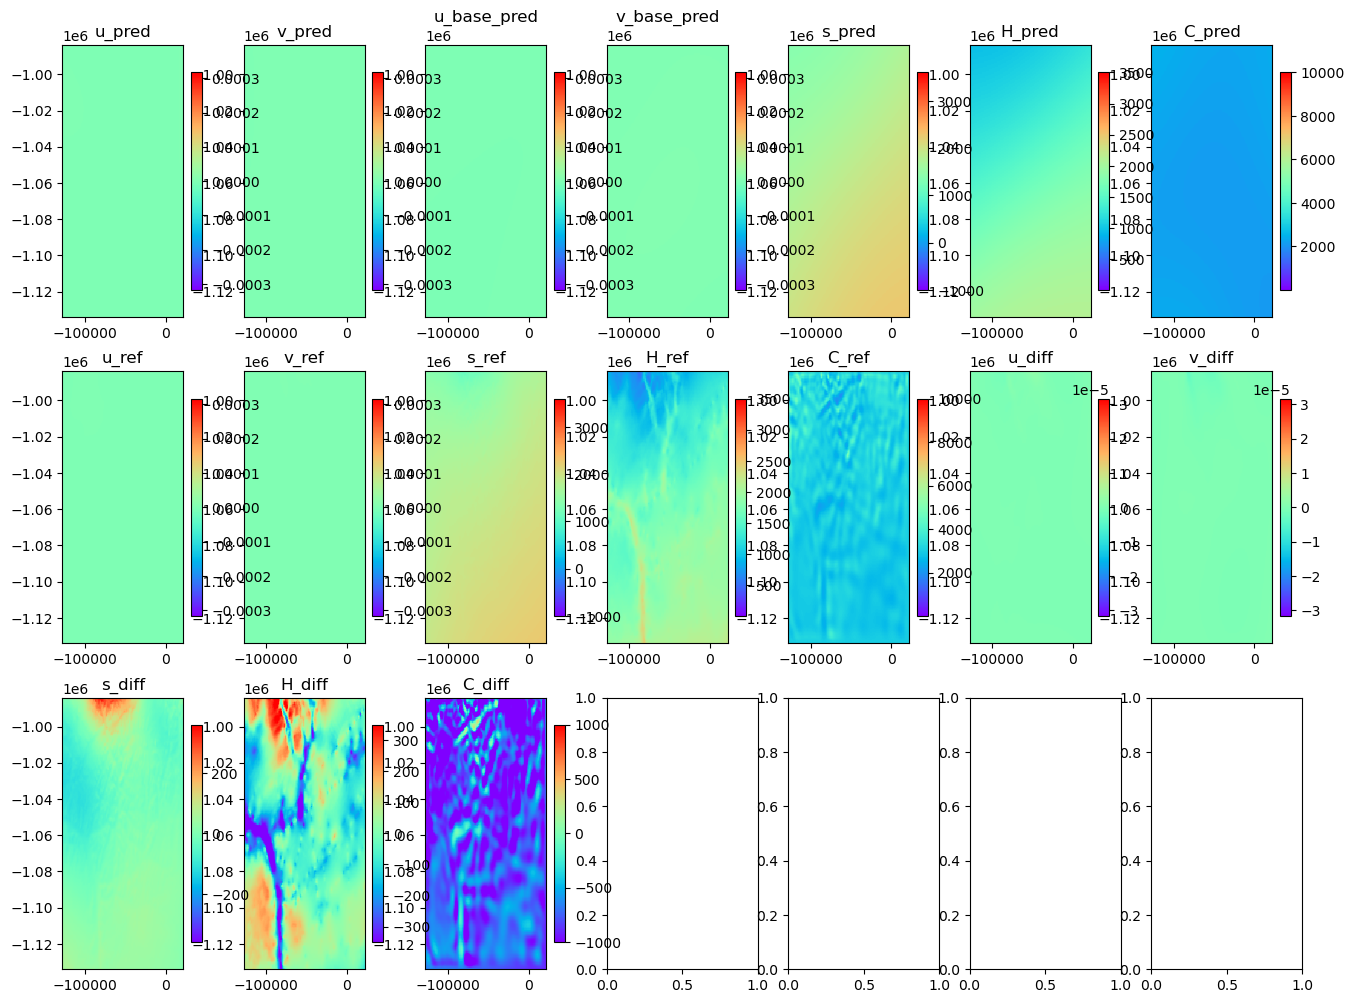

In [147]:
from pinnicle.utils.plotting import plot_solutions
# experiment.plot_predictions(X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

plot_solutions(experiment, X_ref=experiment.model_data.data["ISSM"].X_dict, sol_ref=experiment.model_data.data["ISSM"].data_dict)

In [309]:
# print(len(experiment.training_data))
# print(dir(experiment.training_data[4]))
# print(vars(experiment.training_data[4]))
# print(type(experiment.training_data[3]))
# print(getattr(experiment.training_data[4],'values'))
# print(dir(experiment.training_data[4].collocation_points))
print(dir(experiment.dde_data))
print(type(experiment.domain.vertices))
print(experiment.dde_data.test_x.shape)


['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', 'add_anchors', 'anchors', 'auxiliary_var_fn', 'bc_points', 'bcs', 'exclusions', 'geom', 'losses', 'losses_test', 'losses_train', 'num_bcs', 'num_boundary', 'num_domain', 'num_test', 'pde', 'replace_with_anchors', 'resample_train_points', 'soln', 'test', 'test_aux_vars', 'test_points', 'test_x', 'test_y', 'train_aux_vars', 'train_distribution', 'train_next_batch', 'train_points', 'train_x', 'train_x_all', 'train_x_bc', 'train_y']
<class 'list'>
(53000, 2)


# Accessing PINNICLE parts


print(dir(experiment))<br>
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_update_nn_parameters', '_update_ub_lb_in_nn', 'check_path', 'compile', 'dde_data', 'domain', 'load_model', 'load_setting', 'loss_names', 'model', 'model_data', 'nn', 'params', 'physics', 'plot_history', 'plot_predictions', 'save_history', 'save_model', 'save_setting', 'setup', 'train', 'training_data', 'update_callbacks', 'update_parameters', 'update_training_data']<br>
<br>
Class of each thing listed with dir(experiment)<br>
print(type(experiment.xxxx))<br>
| subclass | class | value |
| ------------- | ------------- | ------------- |
| check_path | method | | 
| compile | method | | 
| load_model | method | | 
| load_setting | method | | 
| plot_history | method | | 
| plot_predictions | method | | 
| save_history | method | | 
| save_model | method | | 
| save_setting | method | | 
| setup | method | | 
| train | method | | 
| update_callbacks | method | | 
| update_parameters | method | | 
| update_training_data | method | | 
| dde_data | deepxde.data.pde.PDE | | 
| domain | pinnicle.domain.domain.Domain | | 
| loss_names | list | ['fSSA1', 'fSSA2', 'u', 'v', 's', 'H', 'C', 'vel log'] |
| model | deepxde.model.Model | | 
| model_data | pinnicle.modeldata.data.Data | | 
| nn | pinnicle.nn.nn.FNN | | 
| params | pinnicle.parameter.Parameters | | 
| physics | pinnicle.physics.physics.Physics | | 
| training_data | list |  [<deepxde.icbc.boundary_conditions.PointSetBC object at 0x344632170>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x344630df0>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bda80>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bda20>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bdae0>, <deepxde.icbc.boundary_conditions.PointSetOperatorBC object at 0x344631d80>] | 
<br>
<br>
<br>
<br>
print(experiment.params) # Different from vars(experiment.params) or dir(experiment.params) because of custom _getattr_ function
Parameters: 
	TrainingParameter: 
		epochs:	10000
		optimizer:	adam
		loss_functions:	['MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', 'MSE', <function surface_log_vel_misfit_tf at 0x3270f0ca0>]
		additional_loss:	{'vel': <pinnicle.parameter.LossFunctionParameter object at 0x3446bd510>}
		learning_rate:	0.0001
		loss_weights:	[1e-10, 1e-10, 9945192.96, 9945192.96, 1e-06, 1e-06, 1e-08, 1e-05]
		has_callbacks:	False
		min_delta:	None
		patience:	None
		period:	None
		checkpoint:	False
		save_path:	./PINNs/Ryder_test_I22-Nov-2024_15-55-05_P25-Nov-24_13-21-43
		is_save:	False
		is_plot:	False
	DomainParameter: 
		shapefile:	./Ryder_32_09.exp
		num_collocation_points:	5000
		time_dependent:	False
		start_time:	0
		end_time:	0
	DataParameter: 
		ISSM:
			data_path:	./Models/Ryder_test_I22-Nov-2024_15-55-05.mat
			data_size:	{'u': 8000, 'v': 8000, 's': 8000, 'H': 8000, 'C': 8000, 'vel': 8000}
			name_map:	{'u': 'u', 'v': 'v', 's': 's', 'H': 'H', 'C': 'C', 'vel': 'vel'}
			X_map:	{'x': 'x', 'y': 'y', 't': 't'}
			source:	ISSM
			default_time:	None

	NNParameter: 
		input_variables:	['x', 'y']
		output_variables:	['u', 'v', 's', 'H', 'C']
		num_neurons:	20
		num_layers:	6
		activation:	tanh
		initializer:	Glorot uniform
		fft:	False
		num_fourier_feature:	10
		sigma:	1.0
		B:	None
		is_parallel:	False
		input_lb:	[ -128000. -1134000.]
		input_ub:	[  22000. -984000.]
		output_lb:	[-3.1709792e-04 -3.1709792e-04 -1.0000000e+03  1.0000000e+01
  1.0000000e-02]
		output_ub:	[3.1709792e-04 3.1709792e-04 3.6000000e+03 3.5000000e+03 1.0000000e+04]
		input_size:	2
		output_size:	5
	PhysicsParameter: 
		SSA:
			rhoi:	917.0
			rhow:	1023.0
			g:	9.81
			yts:	31536000.0
			variable_lb:	{'u': -0.00031709791983764585, 'v': -0.00031709791983764585, 's': -1000.0, 'H': 10.0, 'C': 0.01, 'a': -1.5854895991882294e-07, 'B': 70000000.0, 'u_base': -0.00031709791983764585, 'v_base': -0.00031709791983764585}
			variable_ub:	{'u': 0.00031709791983764585, 'v': 0.00031709791983764585, 's': 3600.0, 'H': 3500.0, 'C': 10000.0, 'a': 1.5854895991882294e-07, 'B': 700000000.0, 'u_base': 0.00031709791983764585, 'v_base': 0.00031709791983764585}
			input:	['x', 'y']
			output:	['u', 'v', 's', 'H', 'C']
			output_lb:	[-0.00031709791983764585, -0.00031709791983764585, -1000.0, 10.0, 0.01]
			output_ub:	[0.00031709791983764585, 0.00031709791983764585, 3600.0, 3500.0, 10000.0]
			data_weights:	[9945192.96, 9945192.96, 1e-06, 1e-06, 1e-08]
			residuals:	['fSSA1', 'fSSA2']
			pde_weights:	[1e-10, 1e-10]
			scalar_variables:	{'n': 3.0, 'B': 52783360.0}





### experiment.dde_data<br>
print(dir(experiment.dde_data))<br>
print(type(experiment.dde_data.xxxx))<br>
| subclass | class | value |
| ------------- | ------------- | ------------- |
| add_anchors |    method | | 
| bc_points |      method | | 
| losses |         method | | 
| losses_test |    method | | 
| losses_train |   method | | 
| pde |            method | | 
| replace_with_anchors | method | | 
| resample_train_points | method | | 
| test |           method | | 
| test_points |    method | | 
| train_next_batch | method | | 
| train_points |   method | | 
| anchors  |       NoneType | | 
| auxiliary_var_fn | NoneType | 
| bcs  | list | [<deepxde.icbc.boundary_conditions.PointSetBC object at 0x344632170>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x344630df0>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bda80>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bda20>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bdae0>, <deepxde.icbc.boundary_conditions.PointSetOperatorBC object at 0x344631d80>] | 
| exclusions |     NoneType | | 
| geom |           deepxde.geometry.geometry_2d.Polygon | | 
| num_bcs |        list |                                  [8000, 8000, 8000, 8000, 8000, 8000] | 
| num_boundary |   int |                                   0 | 
| num_domain |     int |                                   5000 | 
| num_test |       NoneType | | 
| soln  |          NoneType | | 
| test_aux_vars |  NoneType | | 
| test_x |         numpy.ndarray | shape (53000, 2) | 
| test_y |         NoneType | | 
| train_aux_vars | NoneType | | 
| train_distribution | str |                                Hammersley | 
| train_x |        numpy.ndarray | shape (53000, 2) | 
| train_x_all |    numpy.ndarray | shape (5000, 2) | 
| train_x_bc |     numpy.ndarray | shape (48000, 2) | 
| train_y  |       NoneType | | 

#### experiment.dde_data.geom
| subclass | class | value |
| ------------- | ------------- | ------------- |
| background_points | method | |
| boundary_constraint_factor | method | |
| boundary_normal | method | |
| difference | method | |
| distance2boundary | method | |
| inside | method | | 
| intersection | method | |
| mindist2boundary | method | |
| on_boundary | method | |
| periodic_point | method | |
| random_boundary_points | method | |
| random_points | method | |
| uniform_boundary_points | method | |
| uniform_points | method | |
| union | method | |
| area | numpy.float64 | 22500000000.0 |
| bbox | numpy.ndarray | [[ -128000. -1134000.]
 [   22000.  -984000.]] |
| diagonals | numpy.ndarray | shape (5, 5) |
| diam | numpy.float64 | 212132.03435596425 |
| dim | int | 2 |
| idstr | str | Polygon |
| normal | numpy.ndarray | shape (5, 2) |
| nvertices | int | 5 |
| perimeter | numpy.float64 | 600000.0 |
| segments | numpy.ndarray | shape (5, 2) |
| vertices | numpy.ndarray | shape (5, 2) |

### experiment.domain
print(dir(experiment.domain))<br>
print(type(experiment.domain.xxxx))<br>
| subclass | class | value |
| ------------- | ------------- | ------------- |
| get_polygon_vertices | method | | 
| inside |         method | | 
| geometry |       deepxde.geometry.geometry_2d.Polygon | | 
| parameters |     pinnicle.parameter.DomainParameter | | 
| vertices |       list |                                  [[-128000.0, -1134000.0], [0.0, -1134000.0], [22000.0, -1134000.0], [22000.0, -984000.0], [-128000.0, -984000.0]] | 

#### experiment.domain.geometry
| subclass | class | value |
| ------------- | ------------- | ------------- |
| background_points | method | |
| boundary_constraint_factor | method | |
| boundary_normal | method | |
| difference | method | |
| distance2boundary | method | |
| inside | method | |
| intersection | method | |
| mindist2boundary | method | | 
| on_boundary | method | |
| periodic_point | method | |
| random_boundary_points | method | |
| random_points | method | |
| uniform_boundary_points | method | |
| union | method | |
| area | numpy.float64 | 22500000000.0 |
| bbox | numpy.ndarray | shape (2, 2) |
| diagonals | numpy.ndarray | shape (5, 5) | 
| diam | numpy.float64 | 212132.03435596425 |
| dim | int | 2 |
| idistr | str | Polygon |
| normal | numpy.ndarray | shape (5, 2) |
| nvertices | int | 5 |
| perimeter | numpy.float64 | 600000.0 |
| segments | numpy.ndarray | shape (5, 2) |
| vertices | numpy.ndarray | shape (5, 2) |

#### experiment.domain.parameters
| subclass | class | value |
| ------------- | ------------- | ------------- |
| check_consistency | method | |
| end_time | int | 0 |
| has_keys | method | | 
| num_collocation_points | int | 5000 |
| param_dict | dict | {'data': {'ISSM': {'data_path': './Models/Ryder_test_I22-Nov-2024_15-55-05.mat', 'data_size': {'u': 8000, 'v': 8000, 's': 8000, 'H': 8000, 'C': 8000, 'vel': 8000}}}, 'epochs': 10000, 'learning_rate': 0.0001, 'loss_function': 'MSE', 'save_path': './PINNs/Ryder_test_I22-Nov-2024_15-55-05_P25-Nov-24_13-21-43', 'is_save': False, 'is_plot': False, 'activation': 'tanh', 'initializer': 'Glorot uniform', 'num_neurons': 20, 'num_layers': 6, 'input': ['y', 'x'], 'shapefile': './Ryder_32_09.exp', 'num_collocation_points': 5000, 'equations': {'SSA': {'scalar_variables': {'B': 52783360.0}}}, 'additional_loss': {'vel': {'name': 'vel log', 'function': 'VEL_LOG', 'weight': 1e-05}}}| 
| set_default | method | |
| set_parameters | method | |
| shapefile | str | ./Ryder_32_09.exp |
| start_time | int | 0 |
| time_dependent | bool | False |
| update | method | |

### experiment.model<br>
print(dir(experiment.model))<br>
print(type(experiment.model.xxxx))<br>
|subclass |class |value |
| ------------- | ------------- | ------------- |
| compile |           method | | 
| predict |           method | | 
| print_model |       method | | 
| restore |           method | | 
| save  |             method | | 
| state_dict |        method | | 
| train |             method | | 
| batch_size |        NoneType | | 
| callbacks |         NoneType | | 
| data |              deepxde.data.pde.PD | | 
| external_trainable_variables | list | [] | 
| loss_weights |      NoneType | | 
| loss_history |      deepxde.model.LossHistory | | 
| metrics |           NoneType | | 
| net |               deepxde.nn.tensorflow.fnn.FNN | | 
| opt |               NoneType | | 
| opt_name |          NoneType | | 
| outputs  |          NoneType | | 
| outputs_losses_test | Nonetype | | 
| outputs_losses_train | NoneType | | 
| stop_training |     'bool' | False | 
| train_state |       deepxde.model.TrainState | | 
| train_step |        NoneType | | 

<br>
<br>

#### experiment.model.data
| subclass | class | value |
| ------------- | ------------- | ------------- |
| add_anchors | method | |
| bc_points | method | |
| losses | method | |
| losses_test | method | |
| losses_train | method | |
| pde | method | |
| replace_with_anchors | method | |
| resample_train_points | method | |
| test | method | |
| test_points | method | |
| train_next_batch | method | |
| train_points | method | |
| anchors | NoneType | |
| auxiliary_var_fn | NoneType | |
| bcs | list | [<deepxde.icbc.boundary_conditions.PointSetBC object at 0x344632170>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x344630df0>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bda80>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bda20>, <deepxde.icbc.boundary_conditions.PointSetBC object at 0x3446bdae0>, <deepxde.icbc.boundary_conditions.PointSetOperatorBC object at 0x344631d80>] |
| exclusions | NoneType | | 
| geom | deepxde.geometry.geometry_2d.Polygon | | 
| num_bcs | list | [8000, 8000, 8000, 8000, 8000, 8000] |
| num_boundary | int | 0 |
| num_domain | int | 5000 |
| num_test | NoneType | |
| soln | NoneType | |
| test_aux_vars | NoneType | |
| test_x | numpy.ndarray | shape (53000, 2) |
| test_y | NoneType | |
| train_aux_vars | NoneType | |
| train_distribution | str | Hammersley |
| train_x | numpy.ndarray | shape (53000, 2) |
| train_x_all | numpy.ndarray | shape (5000, 2) |
| train_x_bc | numpy.ndarray | shape (48000, 2) |
| train_y | NoneType | |

<br>
<br>


#### experiment.model.losshistory
| subclass | class | value |
| ------------- | ------------- | ------------- |
| append | method | |
| loss_test | list | [] |
| loss_train | list | [] |
| metrics_test | list | [] |
| steps | list | [] |

<br>
<br>

#### experiment.model.net
| subclass | class | value |
| ------------- | ------------- | ------------- |
| add_loss | method | |
| add_metric | method | |
| add_update | method | |
| add_variable | method | |
| add_weight | method | |
| apply_feature_transform | method | |
| apply_output_transform | method | |
| build | method | |
| call | method | | 
| compile | method | |
| compute_loss | method | |
| compute_mask | method | |
| compute_metrics | method | |
| compute_output_shape | method | |
| compute_output_signature | method | |
| count_params | method | |
| evaluate | method | |
| evaluate_generator | method | |
| finalize_state | method | |
| fit | method | |
| fit_generator | method | |
| from_config | method | |
| get_config | method | |
| get_input_at | method | |
| get_input_mask_at | method | |
| get_input_shape_at | method | |
| get_layer | method | |
| get_metrics_result | method | | 
| get_output_at | method | | 
| get_output_mask_at | method | | 
| get_output_shape_at | method | | 
| get_weight_paths | method | | 
| get_weights | method | | 
| load_weights | method | |
| make_predict_function | method | |
| make_test_function | method | |
| make_train_function | method | |
| name_scope | method | |
| num_trainable_parameters | method | |
| predict | method | |
| predict_generator | method | |
| predict_on_batch | method | |
| predict_step | method | |
| reset_metrics | method |  |
| reset_states | method | |
| save | method | |
| save_spec | method | |
| save_weights | method | |
| set_weights | method | |
| summary | method | |
| test_on_batch | method | |
| test_step | method | |
| to_json | method | |
| to_yaml | method | |
| train_on_batch | method | |
| train_step | method | |
| with_name_scope | method |
| activity_regularizer | NoneType | |
| auxiliary_vars | NoneType | |
| built | bool | True |
| compiled_loss | NoneType | |
| compiled_metrics | NoneType | |
| compute_dtype | str | float64 |
| denses | tensorflow.python.trackable.data_structures.ListWrapper | |
| distribute_reduction_method | str | method |
| distribute_strategy | tensorflow.python.distribute.distribute_lib._DefaultDistributionStrategy | |
| dropout_rate | int | 0 |
| dtype | str | float64 |
| dtype_policy | keras.mixed_precision.policy.Policy | |
| dynamic | bool | False |
| history | NoneType | |
| inbound_nodes | list | [] |
| input | Error | |
| input_mask | Error | |
| input_names | NoneType | |
| input_shape | Error | |
| input_spec | NoneType | |
| inputs | NoneType | |
| layers | list | [<keras.layers.core.dense.Dense object at 0x3446bdea0>, <keras.layers.core.dense.Dense object at 0x3446bded0>, <keras.layers.core.dense.Dense object at 0x3446be110>, <keras.layers.core.dense.Dense object at 0x3446be860>, <keras.layers.core.dense.Dense object at 0x3446beb00>, <keras.layers.core.dense.Dense object at 0x3446bf040>, <keras.layers.core.dense.Dense object at 0x3446bf0d0>] |
| losses | list | [] |
| metrics | list | [] |
| metrics_names | list | [] |
| name | str | fnn_1 |
| non_trainable_variables | list | [] |
| non_trainable_weights | list | [] |
| optimizer | NoneType | |
| outbound_nodes | list | [] |
| output | Error | |
| output_mask | Error | |
| output_names | NoneType | |
| output_shape | Error | |
| outputs | NoneType | |
| predict_function | NoneType | |
| regularizer | NoneType | |
| run_eagerly | bool | False |
| state_updates | list | [] |
| stateful | bool | False |
| stop_training | bool | False |
| submodules | tuple | (<keras.layers.core.dense.Dense object at 0x3446bdea0>, <keras.layers.core.dense.Dense object at 0x3446bded0>, <keras.layers.core.dense.Dense object at 0x3446be110>, <keras.layers.core.dense.Dense object at 0x3446be860>, <keras.layers.core.dense.Dense object at 0x3446beb00>, <keras.layers.core.dense.Dense object at 0x3446bf040>, <keras.layers.core.dense.Dense object at 0x3446bf0d0>) |
| supports_masking | bool | False |
| test_function | NoneType | |
| train_function | NoneType | |
| train_tf_function | NoneType | |
| trainable | bool | True |
| trainable_variables | list | length 14 |
| trainable_weights | list | length 14 |
| updates | list | [] |
| variable_dtype | str | float64 |
| variables | list | length 14 |
| weights | list | length 14 |

<br>
<br>

#### experiment.model.train_state
| subclass | class | value |
| ------------- | ------------- | ------------- |
| disregard_best | method | |
| set_data_test | method | |
| set_data_train | method | |
| update_best | method | |
| best_loss_test | numpy.float64 | 0.06511119054858318 |
| best_loss_train | numpy.float64 | 0.06511119054858318 |
| best_metrics | list | [] |
| best_y | numpy.ndarray | shape (53000, 5) |
| best_ystd | NoneType | |
| epoch | int | 10000 |
| loss_test | numpy.ndarray | [1.05431257e-02 7.60757194e-03 4.48367962e-06 5.10836040e-06 1.37268932e-02 2.31275009e-02 5.54470114e-03 4.55180559e-03] |
| loss_train | numpy.ndarray | [1.05431257e-02 7.60757194e-03 4.48367962e-06 5.10836040e-06 1.37268932e-02 2.31275009e-02 5.54470114e-03 4.55180559e-03] | 
| metrics_test | list | [] |
| step | int | 10000 |
| test_aux_vars | NoneType | | 
| train_aux_vars | NoneType | |
| y_pred_test | numpy.ndarray | shape (53000, 5) |
| y_pred_train | numpy.ndarray | shape (53000, 5) |
| y_std_test | NoneType | |
| y_test | NoneType | |
| y_train | NoneType | | 

### experiment.model_data
print(dir(experiment.model_data))<br>
print(type(experiment.model_data.xxxx))<br>
| subclass | class | value |
| ------------- | ------------- | ------------- |
| get_ice_coordinates | method |   |
| load_data |       method |    |
| prepare_training_data | method | |
| data | dict | {"ISSM": <pinnicle.modeldata.issm_data.ISSMmdData object at 0x3446321a0>} |
| g | float | 9.81 |
| parameters | pinnicle.parameter.DataParameter | |
| rhoi | float | 917.0 | 
| rhow | float | 1023.0 | 
| sol | dict | {'u': array, 'v': array, 's': array, 'H': array, 'vel': array, 'C': array} | 
| variable_lb | dict | {'u': -0.00031709791983764585, 'v': -0.00031709791983764585, 's': -1000.0, 'H': 10.0, 'C': 0.01, 'a': -1.5854895991882294e-07, 'B': 70000000.0, 'u_base': -0.00031709791983764585, 'v_base': -0.00031709791983764585} | 
| variable_ub | dict | {'u': 0.00031709791983764585, 'v': 0.00031709791983764585, 's': 3600.0, 'H': 3500.0, 'C': 10000.0, 'a': 1.5854895991882294e-07, 'B': 700000000.0, 'u_base': 0.00031709791983764585, 'v_base': 0.00031709791983764585} | 
| yts | float | 31536000.0 | 

In [8]:
print(dir(experiment.model_data.data))
# print(type(experiment.model.train_state.y_train))
# print(experiment.model.train_state.y_pred_train.shape)

['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


### experiment.nn
print(dir(experiment.nn))
print(type(experiment.nn.xxxx))
| subclass | class | value |
| ------------- | ------------- | ------------- |
| createFNN |             method | | 
| createPFNN |            method | | 
| net |                   deepxde.nn.tensorflow.fnn.FNN | | 
| parameters |            pinnicle.parameter.NNParameter | | 

### experiment.params
print(dir(experiment.params))<br>
print(type(experiment.params.xxxx))<br>
| subclass | class | value |
| ------------- | ------------- | ------------- |
| check_consistency |        method | | 
| has_keys |                 method | | 
| set_default |              method | | 
| set_parameters |           method | | 
| update |                   method | | 
| data |                     pinnicle.parameter.DataParameter | | 
| domain |                   pinnicle.parameter.DomainParameter | | 
| nn |                       pinnicle.parameter.NNParameter | | 
| param_dict |               dict |                           {'data': {'ISSM': {'data_path': <str>, 'data_size': {'u': 8000, 'v': 8000, 's': 8000, 'H': 8000, 'C': 8000, 'vel': 8000}}}, 'epochs': 10000, 'learning_rate': 0.0001, 'loss_function': 'MSE', 'save_path': <str>, 'is_save': False, 'is_plot': False, 'activation': 'tanh', 'initializer': 'Glorot uniform', 'num_neurons': 20, 'num_layers': 6, 'input': ['y', 'x'], 'shapefile': './Ryder_32_09.exp', 'num_collocation_points': 5000, 'equations': {'SSA': {'scalar_variables': {'B': 52783360.0}}}, 'additional_loss': {'vel': {'name': 'vel log', 'function': 'VEL_LOG', 'weight': 1e-05}}} | 
| physics |                  pinnicle.parameter.PhysicsParameter | | 
| training |                 pinnicle.parameter.TrainingParameter | | 

### experiment.physics
print(dir(experiment.physics))<br>
print(type(experiment.physics.xxxx))<br>
| subclass | class | value |
| ------------- | ------------- | ------------- |
| operator |              method | | 
| pdes |                  method | | 
| surf_x |                method | | 
| surf_y |                method | | 
| user_defined_gradient | method | | 
| vel_mag |               method | | 
| data_weights |          list |                   [9945192.96, 9945192.96, 1e-06, 1e-06, 1e-08] | 
| equations |             list |                   [<pinnicle.physics.stressbalance.SSA object at 0x344631d20>] | 
| input_var |             list |                   ['x', 'y'] | 
| output_lb |             list |                   [-0.00031709791983764585, -0.00031709791983764585, -1000.0, 10.0, 0.01] | 
| output_ub |             list |                   [0.00031709791983764585, 0.00031709791983764585, 3600.0, 3500.0, 10000.0] | 
| output_var |            list |                   ['u', 'v', 's', 'H', 'C'] | 
| parameters |            pinnicle.parameter.PhysicsParameter | | 
| pde_weights |           list |                   [1e-10, 1e-10] | | 
| residuals  |            list |                   ['fSSA1', 'fSSA2'] | 